In [1]:
import numpy as np
import random
import math

In [2]:
lst = []
for i in range(0, 100):
    lst.append((np.random.randint(0, 100)))
print(sorted(lst))

[0, 0, 0, 1, 2, 2, 4, 4, 4, 5, 8, 9, 12, 13, 14, 14, 16, 18, 20, 20, 22, 23, 24, 25, 28, 31, 33, 35, 35, 36, 37, 37, 37, 37, 38, 38, 38, 39, 40, 43, 44, 46, 46, 47, 47, 48, 48, 50, 52, 52, 54, 55, 55, 57, 59, 59, 63, 64, 65, 65, 68, 69, 69, 70, 70, 71, 72, 72, 73, 73, 73, 75, 76, 78, 79, 80, 81, 81, 83, 83, 83, 83, 84, 85, 88, 88, 90, 90, 92, 92, 93, 93, 94, 94, 94, 94, 95, 96, 97, 99]


In [3]:
centers_old = [3, 33, 67]
centers_new = [0, 0, 0]
centers_record = [[], [], []]
cluster = [[], [], []]
labels = []

In [4]:
def euclidean_distance(centers, data):
    distance0 = math.sqrt((data - centers[0])**2)
    distance1 = math.sqrt((data - centers[1])**2)
    distance2 = math.sqrt((data - centers[2])**2)
    return distance0, distance1, distance2

In [5]:
threshold = 0.1

In [6]:
def condition(centers_old, centers_new, threshold):
    flag = 0
    if abs(centers_old[0] - centers_new[0]) < threshold:
        flag+=1
    if abs(centers_old[1] - centers_new[1]) < threshold:
        flag+=1
    if abs(centers_old[2] - centers_new[2]) < threshold:
        flag+=1
    if flag==3:
        return True
    else:
        return False

In [7]:
print(centers_new)
print(centers_old)
print(centers_record)


[0, 0, 0]
[3, 33, 67]
[[], [], []]


In [8]:
j=1
while True:
#     print(j)
    cluster = [[], [], []]
    labels = []
    for element in lst:
        
        distance0, distance1, distance2 = euclidean_distance(centers_old, element)
        
        if distance0 < distance1 and distance0 < distance2:
            cluster[0].append(element)
            labels.append(0)
            
        elif distance1 < distance0 and distance1 < distance2:
            cluster[1].append(element)
            labels.append(1)
            
        elif distance2 < distance0 and distance2 < distance1:
            cluster[2].append(element)
            labels.append(2)
    
    for i in range(len(cluster)):
        centers_new[i] = np.average(cluster[i])
        centers_record[i].append(centers_new[i])
    
    if condition(centers_old, centers_new, threshold):
        break
        
    
    centers_old = centers_new
    j += 1

In [9]:
j

2

In [10]:
centers_new

[8.3, 40.0, 79.82978723404256]

In [11]:
np.average(cluster[0])

8.3

In [12]:
# for element in lst:
#     distance0, distance1, distance2 = euclidean_distance(centers, element)
    
#     if distance0 < distance1 and distance0 < distance2:
#         cluster[0].append(element)
#         centers[0] = (centers[0] + element)/2
# #         print("center 0:",(centers[0]+element)/2)
        
#     elif distance1 < distance0 and distance1 < distance2:
#         cluster[1].append(element)
#         centers[1] = (centers[1] + element)/2
# #         print("center 1:",(centers[1]+element)/2)
        
#     elif distance2 < distance0 and distance2 < distance1:
#         cluster[2].append(element)
#         centers[2] = (centers[2] + element)/2
# #         print("center 2:",(centers[2]+element)/2)

In [13]:
len(cluster[0])+len(cluster[1])+len(cluster[2])

100

In [14]:
centers_old

[8.3, 40.0, 79.82978723404256]

In [15]:
for i in cluster:
    print(sorted(i), "\n")
#     print(len(i))

[0, 0, 0, 1, 2, 2, 4, 4, 4, 5, 8, 9, 12, 13, 14, 14, 16, 18, 20, 20] 

[22, 23, 24, 25, 28, 31, 33, 35, 35, 36, 37, 37, 37, 37, 38, 38, 38, 39, 40, 43, 44, 46, 46, 47, 47, 48, 48, 50, 52, 52, 54, 55, 55] 

[57, 59, 59, 63, 64, 65, 65, 68, 69, 69, 70, 70, 71, 72, 72, 73, 73, 73, 75, 76, 78, 79, 80, 81, 81, 83, 83, 83, 83, 84, 85, 88, 88, 90, 90, 92, 92, 93, 93, 94, 94, 94, 94, 95, 96, 97, 99] 



In [16]:
import matplotlib.pyplot as plt

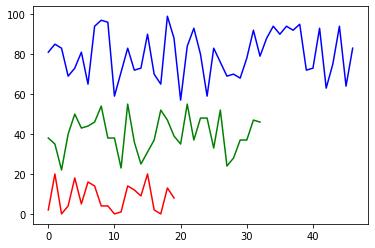

In [30]:
plt.plot(cluster[0], 'r')
plt.plot(cluster[1], 'g')
plt.plot(cluster[2], 'b')
plt.show()

Text(0, 0.5, 'Count of observations')

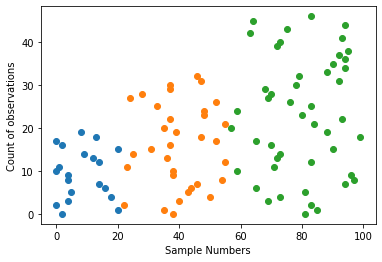

In [18]:
plt.scatter(cluster[0], np.arange(0, len(cluster[0])))
plt.scatter(cluster[1], np.arange(0, len(cluster[1])))
plt.scatter(cluster[2], np.arange(0, len(cluster[2])))
plt.xlabel("Sample Numbers")
plt.ylabel("Count of observations")

In [19]:
centers_old

[8.3, 40.0, 79.82978723404256]

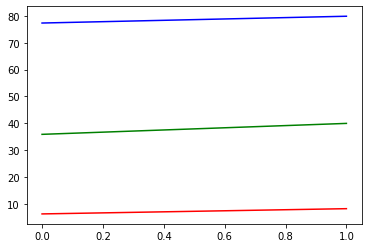

In [20]:
plt.plot(centers_record[0], 'r')
plt.plot(centers_record[1], 'g')
plt.plot(centers_record[2], 'b')
plt.show()

In [21]:
centers_record

[[6.352941176470588, 8.3],
 [35.93103448275862, 40.0],
 [77.3076923076923, 79.82978723404256]]

In [22]:
centers_new

[8.3, 40.0, 79.82978723404256]

#### Importing sklearn library

In [23]:
from sklearn.cluster import KMeans

In [24]:
lst = np.array(lst)
type(lst)

numpy.ndarray

In [25]:
lst = lst.reshape(-1, 1)

In [26]:
classifier = KMeans(n_clusters=3, random_state=123)
classifier.fit(lst)

KMeans(n_clusters=3, random_state=123)

In [27]:
y = classifier.predict(lst)
y = y.reshape(-1, 1)

In [28]:
centers_sklearn = classifier.cluster_centers_
centers_sklearn = centers_sklearn.reshape(1, 3)
print("Centers obtained by sklearn library:", centers_sklearn)

Centers obtained by sklearn library: [[81.29545455 43.78125    10.83333333]]


In [29]:
print("Centers obtained Manually:", centers_new)

Centers obtained Manually: [8.3, 40.0, 79.82978723404256]
